In [7]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly.express as px
import geopandas as gpd
from housing_prices import MrClean, show_map


from matplotlib.ticker import PercentFormatter

plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Read & Clean from previous page
df = MrClean('data/king_county_houses.csv').declutter()

In [97]:
# add price per sqft of lot and living area
df['price_per_sqft_lot']    = df.selling_price / df.sqft_lot
df['price_per_sqft_living'] = df.selling_price / df.sqft_living

df['house_age'] = df.year_built.apply(lambda x: 2023 - x)

In [98]:
# Number of waterfront houses
df.waterfront.value_counts()

waterfront
False    21451
True       146
Name: count, dtype: int64

In [37]:
# Larry Sanders (Buyer) 
# - Waterfront, 
# - limited budget, 
# - nice & isolated but central neighborhood without kids (but got some of his own, just doesn’t want his kids to play with other kids .. because of germs)


# central neighborhood from zipcodes: find out which are the central zipcodes
# neighborhood without kids: houses with low number of bedrooms and big lot sizes around him
# nice and isolated: sqft_lot15 is a big number, meaning neighbors having big lots
# sqft_living15 can indicate big or smaller houses around him
# limited budget: sort by selling price 


# hypothese is he needs minimum of 1 mio dollars
# big lot, size small number of bedrooms
# look at condition for nice house

In [26]:
def show_map(df, size='sqft_lot', color='selling_price'):
    fig2 = px.scatter_mapbox(df,
        lat='lat',
        lon='lon',
        hover_name='selling_price',
        hover_data=['selling_price', 'condition', 'grade', 'bedrooms', 'bathrooms'],
        color='selling_price', #grade, condition
        size='sqft_lot'
    )
    fig2.update_layout(
        title = 'possible houses for Larry to buy in King County, WA, USA',
        geo_scope="usa",
        width=700,
        height=500,
        mapbox_style='carto-positron',
        margin={"r":0,"t":0,"l":0,"b":0}
    )
    fig2.update_geos(fitbounds="locations")
    fig2.show()


In [4]:
df.head()

,grade,condition,floors,bedrooms,bathrooms,waterfront,year_built,year_renovated,selling_price,selling_date,...,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,zipcode,lat,lon,price_per_sqft_lot,price_per_sqft_living
id,,,,,,,,,,,,,,,,,,,,,
7129300520,7,3,1.00,3,1.00,False,1955,0,221900.00,2014-10-13,...,5650,1180,0,1340,5650,98178,47.51,-122.26,39.27,188.05
6414100192,7,3,2.00,3,2.25,False,1951,1991,538000.00,2014-12-09,...,7242,2170,400,1690,7639,98125,47.72,-122.32,74.29,209.34
5631500400,6,3,1.00,2,1.00,False,1933,0,180000.00,2015-02-25,...,10000,770,0,2720,8062,98028,47.74,-122.23,18.00,233.77
2487200875,7,5,1.00,4,3.00,False,1965,0,604000.00,2014-12-09,...,5000,1050,910,1360,5000,98136,47.52,-122.39,120.80,308.16
1954400510,8,3,1.00,3,2.00,False,1987,0,510000.00,2015-02-18,...,8080,1680,0,1800,7503,98074,47.62,-122.05,63.12,303.57


# Larry Sanders (Buyer) 

- Waterfront
- limited budget
- nice & isolated but central neighborhood without kids (but got some of his own, just doesn’t want his kids to play with other kids .. because of germs)


---
 - central neighborhood from zipcodes: find out which are the central zipcodes
 - neighborhood without kids: houses with low number of bedrooms and big lot sizes around him
 - nice and isolated: sqft_lot15 is a big number, meaning neighbors having big lots
 - sqft_living15 can indicate big or smaller houses around him
 - limited budget: sort by selling price 
---


## hypothese

- he'll need a minimum of 1 mio dollars

- *big lot, size small number of bedrooms*
- *look at condition for nice house*

In [44]:
larry = df.query('waterfront == True')
#larry = larry.query('2 < bedrooms <= 4')
#larry = larry.query('bedrooms > 2')
#larry = larry.query('98100 < zipcode < 98200')
#larry = larry.query('selling_price < 1000000')
top10=larry.sort_values(by=['selling_price', 'bedrooms'], ascending=True)#.head(10)

In [101]:
show_map(larry) # all waterfront houses in king county

In [43]:
show_map(larry.query('selling_price < 1000000')) # selling price less than 1mio
# there's nothing in the center

In [30]:

show_map(larry.query('98100 < zipcode < 98200')) # central waterfront houses

In [67]:
# central waterfront houses with more than 2 bedrooms under 1mio 

larry = df.query('waterfront == True')
larry = larry.query('bedrooms > 2')
larry = larry.query('98100 < zipcode < 98200')
larry = larry.query('selling_price < 1000000')
show_map(larry) 

Text(0.5, 1.0, 'grade vs price')

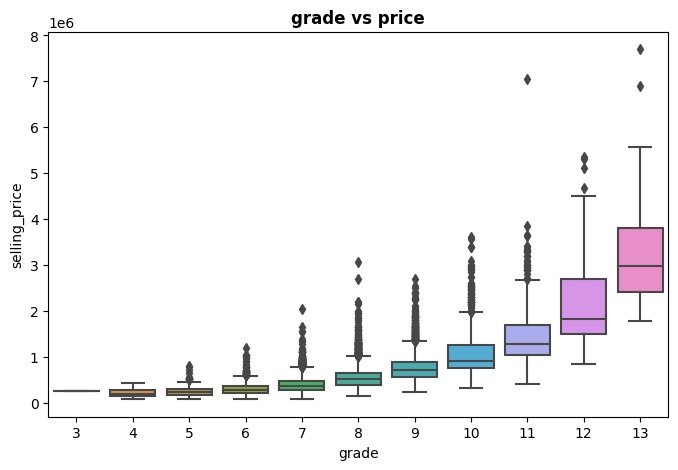

In [18]:
sns.boxplot(data=df, x='grade', y='selling_price')
plt.title('grade vs price', fontweight='bold')

Text(0.5, 1.0, 'condition vs price')

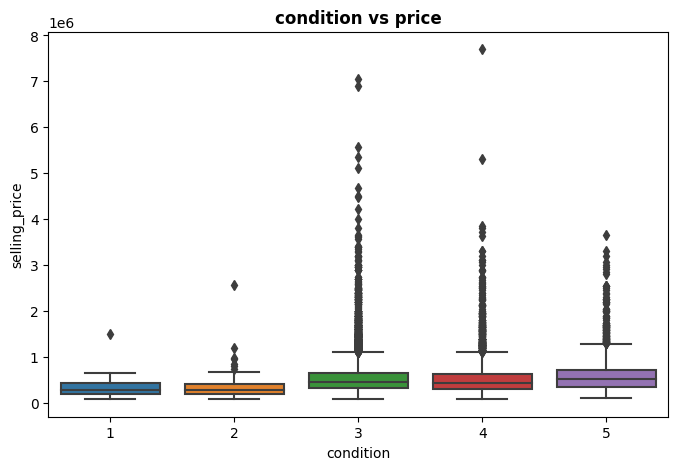

In [19]:
sns.boxplot(data=df, x='condition', y='selling_price')
plt.title('condition vs price', fontweight='bold')

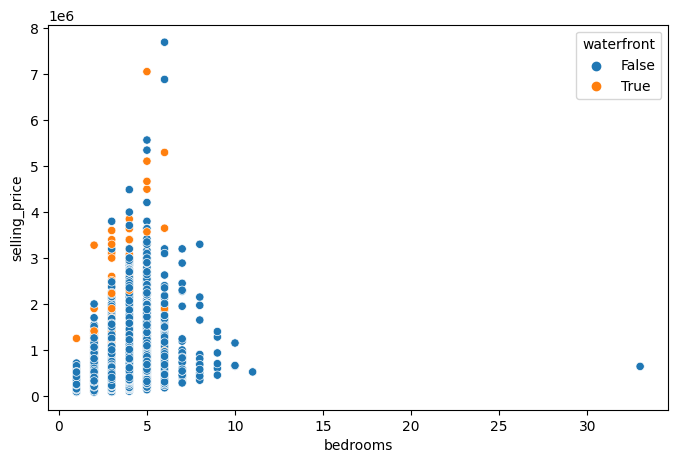

In [72]:

sns.scatterplot(x='bedrooms', y="selling_price", hue = 'waterfront', data=df);

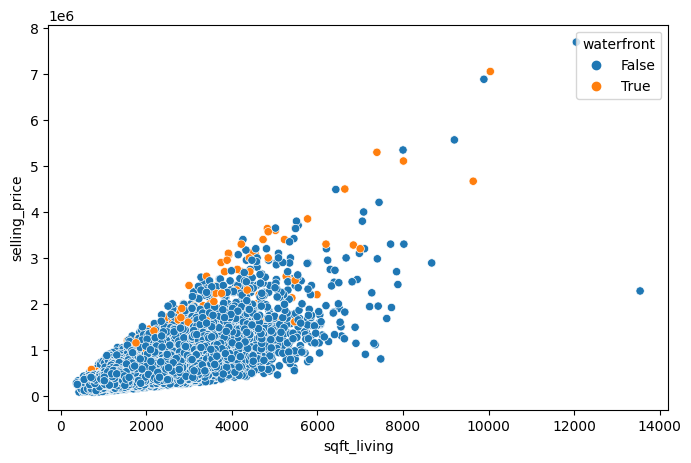

In [74]:
sns.scatterplot(x='sqft_living', y="selling_price", hue = 'waterfront', data=df);

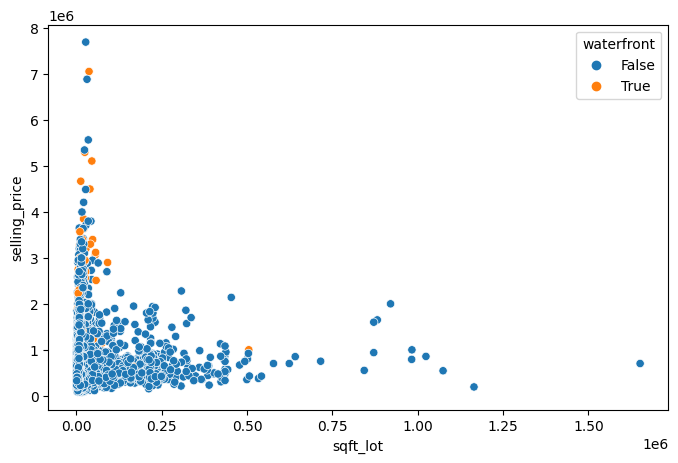

In [70]:

sns.scatterplot(x='sqft_lot', y="selling_price", hue = 'waterfront', data=df);

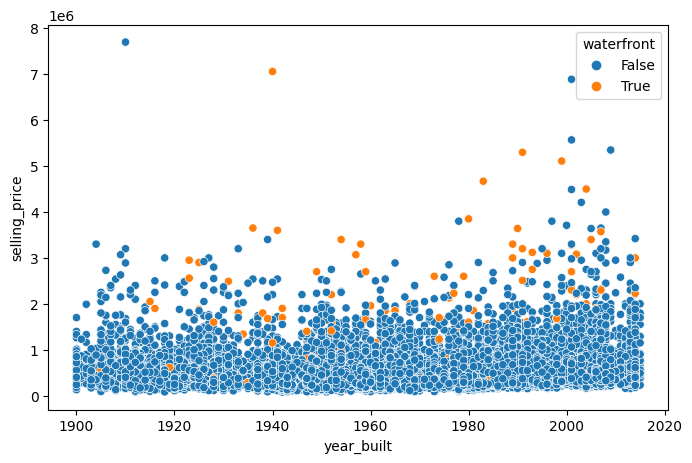

In [80]:
sns.scatterplot(x='year_built', y="selling_price", hue = 'waterfront', data=df);

In [81]:
# avg selling_price per zipcode
df[['zipcode', 'selling_price']].groupby('zipcode').mean().sort_values(by='selling_price')

,selling_price
zipcode,
98002,234284.04
98168,240328.37
98032,251296.24
98001,281194.87
98148,284908.60
...,...
98102,899607.67
98112,1096239.01
98040,1194873.64


In [ ]:
#df.selling_price_range = pd.cut(df.selling_price, bins=[0, 250_000, 500_000, 1_000_000, 5_000_000], right=False)
#[f"{int(s.left)}-{int(s.right)}" for s in sorted(df.selling_price_range.unique())]

Text(0.5, 1.0, 'sqft_living vs price')

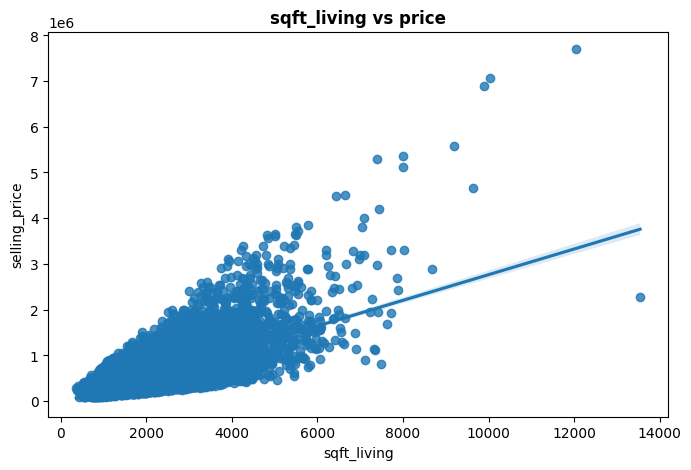

In [82]:
#BIN selling_prices
#BIN sqft

sns.regplot(data=df, x='sqft_living', y='selling_price')
plt.title('sqft_living vs price', fontweight='bold')

Text(0.5, 1.0, 'sqft_lot vs price')

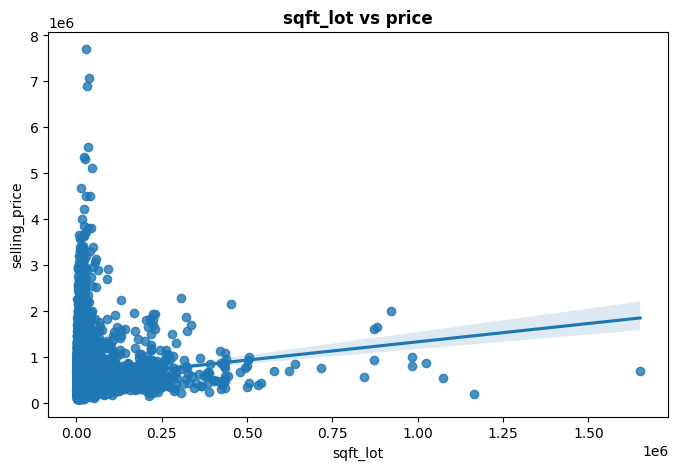

In [83]:

#sns.regplot(data=df, x='sqft_basement', y='selling_price')
#plt.title('sqft_basement vs price', fontweight='bold')

sns.regplot(data=df, x='sqft_lot', y='selling_price')
plt.title('sqft_lot vs price', fontweight='bold')

<Axes: xlabel='grade', ylabel='selling_price'>

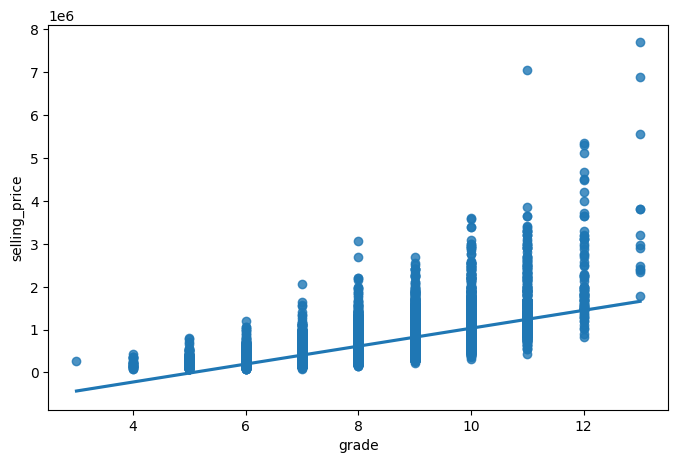

In [87]:
sns.regplot(data=df, x='grade', y='selling_price')

In [ ]:
sns.pairplot(
    data=df,
    y_vars='selling_price',
    x_vars=['grade', 'sqft_living', 'sqft_above', 'sqft_lot', 'sqft_living15', 'bathrooms', 'sqft_basement']
)
                  


## Bining Data

In [ ]:

#pd.qcut(df.selling_price, 6, precision=1)
#pd.cut(df.year_built, bins=8, right=True)

df.year_built_range = pd.cut(df.year_built, bins=10, right=True)
[f"{int(s.left)}–{int(s.right)}" for s in sorted(df.year_built_range.unique())]

# Conclusion

- We won't be able to find Larry a central waterfront house for his limited budget.
- There are some cheaper houses with a nice big lots a bit further away. Maybe on the big estern island.
- You can only have two: waterfront, affordable, central (Waterfront & Central won't be cheap, …)